# Importing the neccessary libraries

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings("ignore")

## Reading the data

In [82]:

df = pd.read_csv('Company_Data.csv')
df.head(15)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [84]:
df.shape

(400, 11)

In [85]:
#  A decision tree can be built with target variable Sale :

## Converting Sales feature into categorical type

In [86]:

sales_category = pd.cut(df.Sales, bins=[0, 5.39, 9.32, 16.27], labels=['low', 'moderate', 'high'])
df.insert(0, 'Sales_category', sales_category)
df.drop(['Sales'], axis=1, inplace=True)

In [87]:
df

,Sales_category,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high,111,48,16,260,83,Good,65,10,Yes,Yes
2,high,113,35,10,269,80,Medium,59,12,Yes,Yes
3,moderate,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,Good,33,14,Yes,Yes
396,moderate,139,23,3,37,120,Medium,55,11,No,Yes
397,moderate,162,26,12,368,159,Medium,40,18,Yes,Yes
398,moderate,100,79,7,284,95,Bad,50,12,Yes,Yes


In [88]:
df['ShelveLoc'], class_names = pd.factorize(df['ShelveLoc'])
df.ShelveLoc

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [89]:
df['Urban'], class_names2 = pd.factorize(df['Urban'])
df.Urban

0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    1
397    0
398    0
399    0
Name: Urban, Length: 400, dtype: int64

In [90]:
df['US'].replace(to_replace=['Yes', 'No'], value=['0', '1'], inplace=True)
df.US

0      0
1      0
2      0
3      0
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: US, Length: 400, dtype: object

In [91]:
df

,Sales_category,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,0,42,17,0,0
1,high,111,48,16,260,83,1,65,10,0,0
2,high,113,35,10,269,80,2,59,12,0,0
3,moderate,117,100,4,466,97,2,55,14,0,0
4,low,141,64,3,340,128,0,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,1,33,14,0,0
396,moderate,139,23,3,37,120,2,55,11,1,0
397,moderate,162,26,12,368,159,2,40,18,0,0
398,moderate,100,79,7,284,95,0,50,12,0,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sales_category  399 non-null    category
 1   CompPrice       400 non-null    int64   
 2   Income          400 non-null    int64   
 3   Advertising     400 non-null    int64   
 4   Population      400 non-null    int64   
 5   Price           400 non-null    int64   
 6   ShelveLoc       400 non-null    int64   
 7   Age             400 non-null    int64   
 8   Education       400 non-null    int64   
 9   Urban           400 non-null    int64   
 10  US              400 non-null    object  
dtypes: category(1), int64(9), object(1)
memory usage: 31.9+ KB


In [93]:
df.isna().sum()

Sales_category    1
CompPrice         0
Income            0
Advertising       0
Population        0
Price             0
ShelveLoc         0
Age               0
Education         0
Urban             0
US                0
dtype: int64

In [94]:
df.dropna(inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sales_category  399 non-null    category
 1   CompPrice       399 non-null    int64   
 2   Income          399 non-null    int64   
 3   Advertising     399 non-null    int64   
 4   Population      399 non-null    int64   
 5   Price           399 non-null    int64   
 6   ShelveLoc       399 non-null    int64   
 7   Age             399 non-null    int64   
 8   Education       399 non-null    int64   
 9   Urban           399 non-null    int64   
 10  US              399 non-null    object  
dtypes: category(1), int64(9), object(1)
memory usage: 34.8+ KB


## Outlier detection using isolation forest

In [96]:
df_copy = df.copy()
data_encoded = pd.get_dummies(df_copy)

### Training the model

In [97]:
clf = IsolationForest(random_state=10, contamination=0.01)
clf.fit(data_encoded)

IsolationForest(contamination=0.01, random_state=10)

### Predictions

In [98]:
y_pred_outliers = clf.predict(data_encoded)

In [99]:
data_encoded

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,Sales_category_low,Sales_category_moderate,Sales_category_high,US_0,US_1
0,138,73,11,276,120,0,42,17,0,0,0,1,1,0
1,111,48,16,260,83,1,65,10,0,0,0,1,1,0
2,113,35,10,269,80,2,59,12,0,0,0,1,1,0
3,117,100,4,466,97,2,55,14,0,0,1,0,1,0
4,141,64,3,340,128,0,38,13,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0,0,1,1,0
396,139,23,3,37,120,2,55,11,1,0,1,0,1,0
397,162,26,12,368,159,2,40,18,0,0,1,0,1,0
398,100,79,7,284,95,0,50,12,0,0,1,0,1,0


In [100]:
data_encoded['scores'] = clf.decision_function(data_encoded)
data_encoded['anomaly'] = clf.predict(data_encoded.iloc[:, 0:14])
data_encoded

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,Sales_category_low,Sales_category_moderate,Sales_category_high,US_0,US_1,scores,anomaly
0,138,73,11,276,120,0,42,17,0,0,0,1,1,0,0.095616,1
1,111,48,16,260,83,1,65,10,0,0,0,1,1,0,0.086739,1
2,113,35,10,269,80,2,59,12,0,0,0,1,1,0,0.110598,1
3,117,100,4,466,97,2,55,14,0,0,1,0,1,0,0.134853,1
4,141,64,3,340,128,0,38,13,0,1,0,0,0,1,0.074690,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0,0,1,1,0,0.102631,1
396,139,23,3,37,120,2,55,11,1,0,1,0,1,0,0.080479,1
397,162,26,12,368,159,2,40,18,0,0,1,0,1,0,0.070422,1
398,100,79,7,284,95,0,50,12,0,0,1,0,1,0,0.115920,1


###  Print the outlier data points

In [101]:
data_encoded[data_encoded['anomaly']==-1]

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,Sales_category_low,Sales_category_moderate,Sales_category_high,US_0,US_1,scores,anomaly
42,77,69,0,25,24,2,50,18,0,0,0,1,0,1,-0.036655,-1
75,88,111,23,480,92,0,36,16,1,0,1,0,1,0,-0.002801,-1
229,98,104,0,404,72,2,27,18,1,0,0,1,0,1,-0.016184,-1
367,95,106,0,256,53,1,52,17,0,0,0,1,0,1,-0.010730,-1


In [102]:
df.drop([42, 75, 229, 367], inplace=True)
df

,Sales_category,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,0,42,17,0,0
1,high,111,48,16,260,83,1,65,10,0,0
2,high,113,35,10,269,80,2,59,12,0,0
3,moderate,117,100,4,466,97,2,55,14,0,0
4,low,141,64,3,340,128,0,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,1,33,14,0,0
396,moderate,139,23,3,37,120,2,55,11,1,0
397,moderate,162,26,12,368,159,2,40,18,0,0
398,moderate,100,79,7,284,95,0,50,12,0,0


## Build decision tree classifier using entropy criteria

In [103]:
x = df.iloc[:, 1:]
y = df['Sales_category']

In [104]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,0,0
1,111,48,16,260,83,1,65,10,0,0
2,113,35,10,269,80,2,59,12,0,0
3,117,100,4,466,97,2,55,14,0,0
4,141,64,3,340,128,0,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0
396,139,23,3,37,120,2,55,11,1,0
397,162,26,12,368,159,2,40,18,0,0
398,100,79,7,284,95,0,50,12,0,0


In [105]:
y

0          high
1          high
2          high
3      moderate
4           low
         ...   
395        high
396    moderate
397    moderate
398    moderate
399        high
Name: Sales_category, Length: 395, dtype: category
Categories (3, object): ['low' < 'moderate' < 'high']

In [106]:
df['Sales_category'].unique()

['high', 'moderate', 'low']
Categories (3, object): ['low' < 'moderate' < 'high']

In [107]:
df.Sales_category.value_counts()

moderate    200
low          99
high         96
Name: Sales_category, dtype: int64

### Splitting the data into train and test data set

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [109]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [110]:
df.columns

Index(['Sales_category', 'CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

### Plot the tree

[Text(0.4351851851851852, 0.9, 'ShelveLoc <= 0.5\nentropy = 1.499\nsamples = 276\nvalue = [73, 65, 138]\nclass = high'),
 Text(0.16666666666666666, 0.7, 'Price <= 89.5\nentropy = 1.236\nsamples = 70\nvalue = [4, 39, 27]\nclass = moderate'),
 Text(0.07407407407407407, 0.5, 'CompPrice <= 123.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 0, 8]\nclass = high'),
 Text(0.037037037037037035, 0.3, 'entropy = 0.0\nsamples = 8\nvalue = [0, 0, 8]\nclass = high'),
 Text(0.1111111111111111, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = low'),
 Text(0.25925925925925924, 0.5, 'CompPrice <= 144.0\nentropy = 1.021\nsamples = 59\nvalue = [1, 39, 19]\nclass = moderate'),
 Text(0.18518518518518517, 0.3, 'Price <= 105.0\nentropy = 0.852\nsamples = 54\nvalue = [0, 39, 15]\nclass = moderate'),
 Text(0.14814814814814814, 0.1, 'entropy = 0.94\nsamples = 14\nvalue = [0, 5, 9]\nclass = high'),
 Text(0.2222222222222222, 0.1, 'entropy = 0.61\nsamples = 40\nvalue = [0, 34, 6]\nclass = moderate'),
 Te

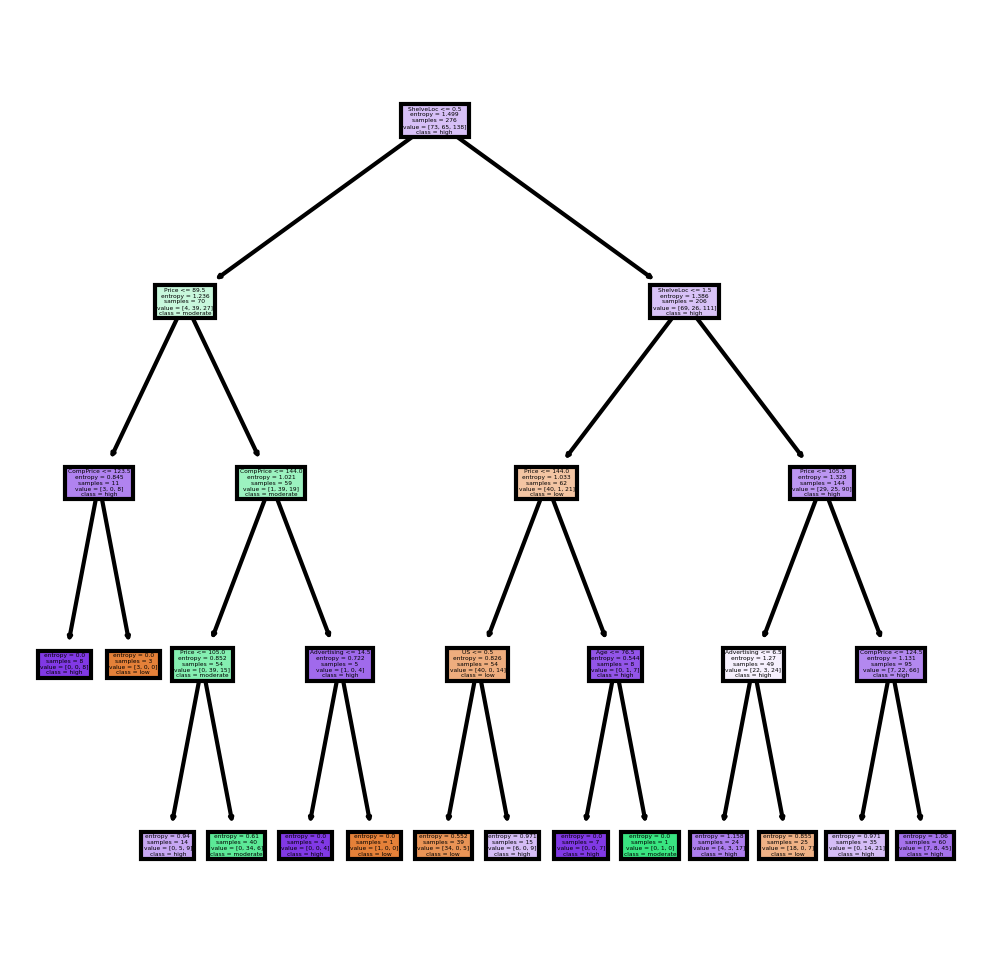

In [111]:


fn = ['CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn = ['low', 'moderate', 'high']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True)

### Predicting on test data

In [112]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

moderate    81
high        25
low         13
dtype: int64

In [113]:
preds

array(['moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'high',
       'moderate', 'low', 'moderate', 'moderate', 'moderate', 'moderate',
       'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'low',
       'high', 'high', 'low', 'moderate', 'moderate', 'moderate', 'high',
       'high', 'moderate', 'moderate', 'moderate', 'high', 'moderate',
       'moderate', 'low', 'moderate', 'moderate', 'moderate', 'moderate',
       'moderate', 'moderate', 'moderate', 'moderate', 'low', 'moderate',
       'moderate', 'moderate', 'low', 'moderate', 'high', 'moderate',
       'moderate', 'moderate', 'moderate', 'high', 'moderate', 'moderate',
       'low', 'moderate', 'low', 'moderate', 'moderate', 'high',
       'moderate', 'high', 'high', 'moderate', 'high', 'moderate',
       'moderate', 'moderate', 'high', 'moderate', 'low', 'moderate',
       'low', 'high', 'moderate', 'high', 'moderate', 'moderate', 'high',
       'moderate', 'low', 'moderate', 'high', 'high', 'high', '

In [114]:
# Getting the 2 way table to understand the correct and wrong predictions
    
pd.crosstab(y_test,preds)

col_0,high,low,moderate
Sales_category,,,
low,0,8,26
moderate,12,4,46
high,13,1,9


In [115]:
# Accuracy

np.mean(preds==y_test)

0.5630252100840336

## Decision tree classifier CART using Gini criteria

In [116]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [117]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

### Prediction and computing the Accuracy

In [118]:
pred = model_gini.predict(x_test)
np.mean(pred==y_test)

0.5462184873949579

In [119]:
### # Plot the tree

[Text(0.5267857142857143, 0.9, 'ShelveLoc <= 0.5\ngini = 0.625\nsamples = 276\nvalue = [73, 65, 138]\nclass = high'),
 Text(0.2857142857142857, 0.7, 'Price <= 105.0\ngini = 0.538\nsamples = 70\nvalue = [4, 39, 27]\nclass = moderate'),
 Text(0.14285714285714285, 0.5, 'Population <= 305.0\ngini = 0.483\nsamples = 25\nvalue = [3, 5, 17]\nclass = high'),
 Text(0.07142857142857142, 0.3, 'Income <= 105.0\ngini = 0.153\nsamples = 12\nvalue = [1, 0, 11]\nclass = high'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11]\nclass = high'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = low'),
 Text(0.21428571428571427, 0.3, 'Price <= 88.5\ngini = 0.615\nsamples = 13\nvalue = [2, 5, 6]\nclass = high'),
 Text(0.17857142857142858, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [2, 0, 4]\nclass = high'),
 Text(0.25, 0.1, 'gini = 0.408\nsamples = 7\nvalue = [0, 5, 2]\nclass = moderate'),
 Text(0.42857142857142855, 0.5, 'CompPrice <= 144.0\ngin

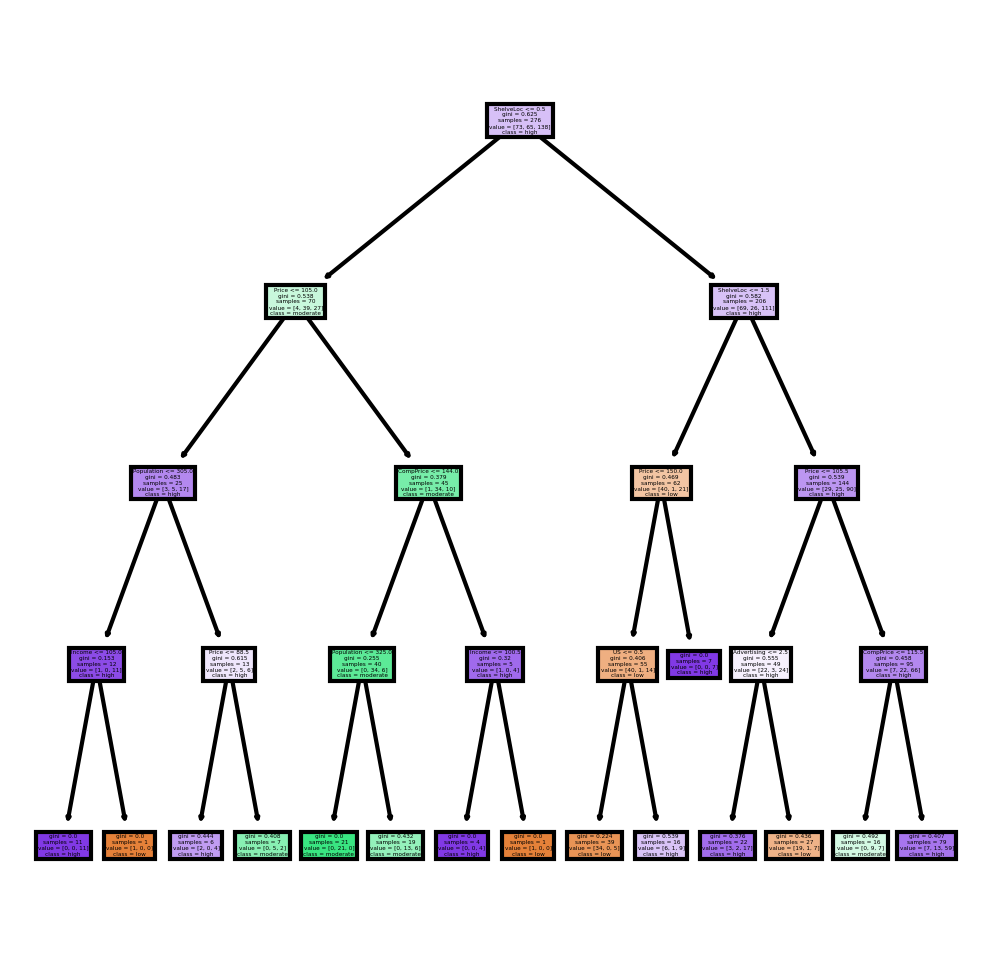

In [120]:
fn = ['CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn = ['low', 'moderate', 'high']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True)